## Observations and Insights 

This Analysis was done observing the tumor volume of the mice during the treatments of 10 drug Regimens. Mice treated with Capomulin and Ramicane had relatively low mean value of the Tumor volumes. Mice treated with Katapril, Naftiso and Placebo have had relatively large tumor volumes as well as variations in their volume. Number of measurements with Capomulin and Ramicane are higher among the 10 drug regimens and Propriva has the lowest number of measurements taken. In the test number of female mice exceeds the number of male mouse by 2%. With the analysis of box plots we can see the final tumor volumes of the mice treated with Capomulin and Ramicane are lower than the tumor volumes of mice treated with Infubinol and Caftemin. This information is not sufficient to make any decision of the efficacy of the treatment because the mean tumor volumes of the mice treated with those two drug regimens were lower compared to others. 
When tumor volume is compared with weight of the mice we can observe a positive, linear correlation between the two factors.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.head())
print(study_results.head())
# Combine the data into a single dataset
data=pd.merge(mouse_metadata,study_results, how='outer', on='Mouse ID')

# Display the data table for preview
data.head(5)

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0     k403     Ramicane    Male          21          16
1     s185    Capomulin  Female           3          17
2     x401    Capomulin  Female          16          15
3     m601    Capomulin    Male          22          17
4     g791     Ramicane    Male          11          16
  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     b128          0                45.0                 0
1     f932          0                45.0                 0
2     g107          0                45.0                 0
3     a457          0                45.0                 0
4     c819          0                45.0                 0


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
print (f"Number of mice are =", data['Mouse ID'].nunique())

Number of mice are = 249


In [13]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data['Timepoint'] = data['Timepoint'].astype(str)
data['Duplicate ID'] = data['Timepoint'].str.cat(data['Mouse ID'],sep="")
data.head

<bound method NDFrame.head of      Mouse ID Drug Regimen   Sex  Age_months  Weight (g) Timepoint  \
0        k403     Ramicane  Male          21          16         0   
1        k403     Ramicane  Male          21          16         5   
2        k403     Ramicane  Male          21          16        10   
3        k403     Ramicane  Male          21          16        15   
4        k403     Ramicane  Male          21          16        20   
...       ...          ...   ...         ...         ...       ...   
1888     z969     Naftisol  Male           9          30        25   
1889     z969     Naftisol  Male           9          30        30   
1890     z969     Naftisol  Male           9          30        35   
1891     z969     Naftisol  Male           9          30        40   
1892     z969     Naftisol  Male           9          30        45   

      Tumor Volume (mm3)  Metastatic Sites Duplicate ID  
0              45.000000                 0        0k403  
1            

In [14]:
# there are (1893-1888)5 records of duplicates. 
duplicate = data[data['Duplicate ID'].duplicated()] 
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate ID
909,g989,Propriva,Female,21,26,0,45.000000,0,0g989
911,g989,Propriva,Female,21,26,5,47.570392,0,5g989
913,g989,Propriva,Female,21,26,10,49.880528,0,10g989
915,g989,Propriva,Female,21,26,15,53.442020,0,15g989
917,g989,Propriva,Female,21,26,20,54.657650,1,20g989


In [15]:
#Optional: Get all the data for the duplicate mouse ID. This assignment suggesting to drop Mouse 'g989'

data['Duplicate ID'].nunique()

1888

In [49]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID
data.drop(data.loc[data['Mouse ID']=='g989'].index,inplace=True)
data.dropna()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Duplicate ID
0,k403,Ramicane,Male,21,16,0.0,45.000000,0,0k403
1,k403,Ramicane,Male,21,16,5.0,38.825898,0,5k403
2,k403,Ramicane,Male,21,16,10.0,35.014271,1,10k403
3,k403,Ramicane,Male,21,16,15.0,34.223992,1,15k403
4,k403,Ramicane,Male,21,16,20.0,32.997729,1,20k403
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25.0,63.145652,2,25z969
1889,z969,Naftisol,Male,9,30,30.0,65.841013,3,30z969
1890,z969,Naftisol,Male,9,30,35.0,69.176246,4,35z969
1891,z969,Naftisol,Male,9,30,40.0,70.314904,4,40z969


In [50]:
# Checking the number of mice in the clean DataFrame. it should be same as we dropped only the duplicate values
#(at specific time )point.number of records are less but the number of mice remains same
print (f"Number of mice are =", data['Mouse ID'].nunique())

Number of mice are = 248


## Summary Statistics

In [51]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean_data=data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].mean()
re_mean_data=mean_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)-Mean'},axis='columns')
med_data=data.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
re_med_data=med_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)-Mdian'},axis='columns')
var_data=data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].var()
re_var_data=var_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)-Variance'}, axis='columns')
std_data=data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].std()
re_std_data=std_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)-STD'}, axis='columns')
sem_data=data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].sem()
re_sem_data=sem_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)-SEM'}, axis='columns')

In [52]:
#re_med_data=med_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)_Median'},axis='columns')

#re_med_data.head()
#med_data.head()

In [53]:
mean_med_data = pd.merge(re_mean_data, re_med_data, on='Drug Regimen',how='inner')
mean_med_var_data=pd.merge(mean_med_data, re_var_data, on='Drug Regimen',how='inner')
mean_med_var_std_data=pd.merge(mean_med_var_data, re_std_data, on='Drug Regimen',how='inner')
Summary_data=pd.merge(mean_med_var_std_data, re_sem_data, on='Drug Regimen',how='inner')
#re_Summary_data=Summary_data.rename({'Tumor Volume (mm3)':'Tumor Volume (mm3)-Median'},axis='columns')
Summary_data.head(10)

,Tumor Volume (mm3)-Mean,Tumor Volume (mm3),Tumor Volume (mm3)-Variance,Tumor Volume (mm3)-STD,Tumor Volume (mm3)-SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [54]:

# Using the aggregation method, produce the same summary statistics in a single line
Agg_Summary = data.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var','std','sem']})
Agg_Summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Total Number of Measurement')

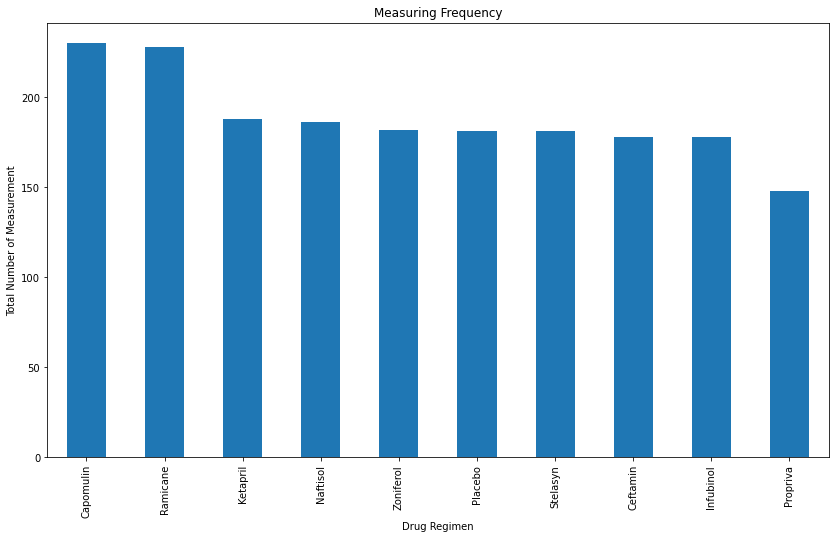

In [55]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
frq_plot=data['Drug Regimen'].value_counts().plot(kind='bar',figsize=(14,8),title='Measuring Frequency')
frq_plot.set_xlabel('Drug Regimen')
frq_plot.set_ylabel('Total Number of Measurement')


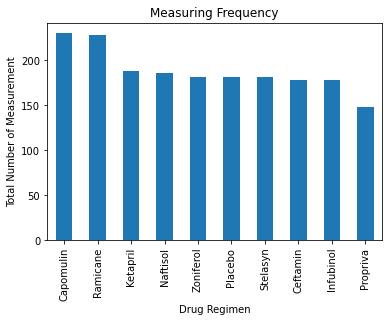

In [56]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
measure_data=data['Drug Regimen'].value_counts()
measure_data.plot(kind='bar')
plt.title('Measuring Frequency')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Number of Measurement')
plt.show()

gender_data details
 Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64


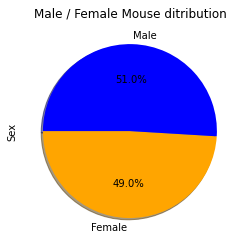

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_data=data.groupby('Sex')['Mouse ID'].count()
print('gender_data details''\n', gender_data.head())
labels=list(gender_data.index)
colors = ["orange", "blue"]
plt.pie(gender_data, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title('Male / Female Mouse ditribution')
plt.ylabel('Sex')

plt.show()

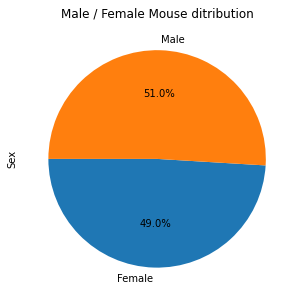

In [58]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pltpie = gender_data.plot.pie(y=gender_data, figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male / Female Mouse ditribution')
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
data['Timepoint']=data['Timepoint'].astype(float)
# Start by getting the last (greatest) timepoint for each mouse
cap_data=data.loc[data['Drug Regimen']=='Capomulin']
Ram_data=data.loc[data['Drug Regimen']=='Ramicane']
Inf_data=data.loc[data['Drug Regimen']=='Infubinol']
Cef_data=data.loc[data['Drug Regimen']=='Ceftamin']
last_cap_data=cap_data.groupby('Mouse ID').max()['Timepoint']
last_Ram_data=Ram_data.groupby('Mouse ID').max()['Timepoint']
last_Inf_data=Inf_data.groupby('Mouse ID').max()['Timepoint']
last_Cef_data=Cef_data.groupby('Mouse ID').max()['Timepoint']

In [60]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
cap_merge = pd.merge(last_cap_data, data, on=("Mouse ID","Timepoint"),how="left")
Ram_merge = pd.merge(last_Ram_data, data, on=("Mouse ID","Timepoint"),how="left")
Inf_merge = pd.merge(last_Inf_data, data, on=("Mouse ID","Timepoint"),how="left")
Cef_merge = pd.merge(last_Cef_data, data, on=("Mouse ID","Timepoint"),how="left")


In [61]:
#merging all df's with final tumer volume
merge1=cap_merge.append(Ram_merge, ignore_index=True)
merge2=Inf_merge.append(Cef_merge, ignore_index=True)
merge_vol_data=merge1.append(merge2, ignore_index=True)
merge_vol_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites,Duplicate ID
0,b128,45.0,Capomulin,Female,9,22,38.982878,2,45b128
1,b742,45.0,Capomulin,Male,7,21,38.939633,0,45b742
2,f966,20.0,Capomulin,Male,16,17,30.485985,0,20f966
3,g288,45.0,Capomulin,Male,3,19,37.074024,1,45g288
4,g316,45.0,Capomulin,Female,22,22,40.159220,2,45g316
...,...,...,...,...,...,...,...,...,...
95,x226,0.0,Ceftamin,Male,23,28,45.000000,0,0x226
96,x581,45.0,Ceftamin,Female,19,28,64.634949,3,45x581
97,x822,45.0,Ceftamin,Male,3,29,61.386660,3,45x822
98,y769,45.0,Ceftamin,Female,6,27,68.594745,4,45y769


In [62]:
# Put treatments into a list for for loop (and later for plot labels)
treatment=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)    

merge_vol_data = merge_vol_data.reset_index()
tumor_size_data =merge_vol_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_list_df = pd.DataFrame(tumor_size_data )
tumor_list_df = tumor_list_df.reindex(treatment)
tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
cap_tumors = cap_merge["Tumor Volume (mm3)"]

quartiles =cap_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")    
  
# add subset    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [63]:
Inf_tumors = Inf_merge["Tumor Volume (mm3)"]

quartiles =Inf_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Infubinol tumors: {lowerq}")
print(f"The upper quartile of Infubinol tumors: {upperq}")
print(f"The interquartile range of Infubinol tumors: {iqr}")
print(f"The median of Infubinol tumors: {quartiles[0.5]} ")    
  
# add subset    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol tumors: 54.04860769
The upper quartile of Infubinol tumors: 65.52574285
The interquartile range of Infubinol tumors: 11.477135160000003
The median of Infubinol tumors: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [64]:
Cef_tumors = Cef_merge["Tumor Volume (mm3)"]

quartiles =Cef_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ceftamin tumors: {lowerq}")
print(f"The upper quartile of Ceftamin tumors: {upperq}")
print(f"The interquartile range of Ceftamin tumors: {iqr}")
print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")    
  
# add subset    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin tumors: 48.72207785
The upper quartile of Ceftamin tumors: 64.29983003
The interquartile range of Ceftamin tumors: 15.577752179999997
The median of Ceftamin tumors: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [65]:
Ram_tumors = Ram_merge["Tumor Volume (mm3)"]

quartiles =Ram_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of Ramicane tumors: {lowerq}")
print(f"The upper quartile of Ramicane tumors: {upperq}")
print(f"The interquartile range of Ramicane tumors: {iqr}")
print(f"The median of Ramicane tumors: {quartiles[0.5]} ")    
  
# add subset    
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane tumors: 31.56046955
The upper quartile of Ramicane tumors: 40.65900627
The interquartile range of Ramicane tumors: 9.098536719999998
The median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


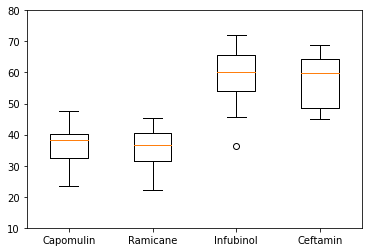

In [66]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vols, labels=treatment)
plt.ylim(10, 80)
plt.show()



## Line and Scatter Plots

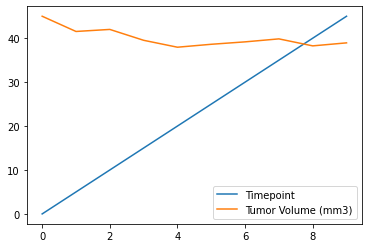

In [67]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumer_change = data[data["Mouse ID"].isin(["b742"])]

tumer_change_data = tumer_change[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumer_change_data

plot_df = tumer_change_data.reset_index()
plot_df

plot1 = plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
plot1

lines = plot1.plot.line()

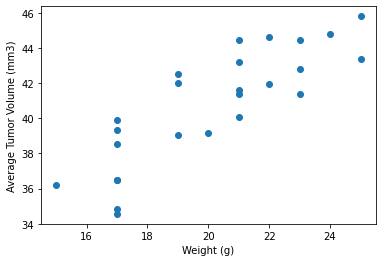

In [68]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_table = data.loc[data["Drug Regimen"]=="Capomulin"]
capomulin_table.dropna()
capomulin_average = capomulin_table.groupby('Mouse ID').mean() 
plt.scatter(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)']) 
plt.xlabel('Weight (g)') 
plt.ylabel('Average Tumor Volume (mm3)') 
plt.show()

## Correlation and Regression

In [69]:
from sklearn.linear_model import LinearRegression

In [70]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=round(st.pearsonr(cap_merge['Weight (g)'],cap_merge['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

model_data=st.linregress(cap_merge['Weight (g)'],cap_merge['Tumor Volume (mm3)'])
model_data


The correlation between mouse weight and average tumor volume is 0.88


LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.0844290886732e-09, stderr=0.20026513236453639)

In [71]:
slope=1.75
intercept=1.44

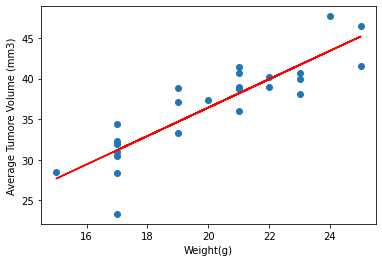

In [72]:
y_values = cap_merge['Weight (g)']*slope+intercept
plt.scatter(cap_merge['Weight (g)'],cap_merge['Tumor Volume (mm3)'])
plt.plot(cap_merge['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()